<a href="https://colab.research.google.com/github/pleunipennings/CSC508_ML_Biomedicine_Class/blob/main/Module2/Module_2a_Classification_Decision_Tree_Cleveland_dataset_CSC508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Welcome to the Module 2 coding part: Classification Decision Tree!**

*This notebook was created by Vaisakh Kusabhadran, Amisha Dhawan, Yuomi Zavaleta, Lorena Benitez (all SFSU students), Lucy Moctezuma (CSUEB student) and Pleuni Pennings (SFSU bio professor).* 


#OBJECTIVE OF THIS NOTEBOOK:

We are going be working with **heart disease data** from the Cleveland dataset. 

The Cleveland dataset is actually quite old, and it is sort of a classic dataset to apply machine learning methods. The dataset has a lot of variables that are measured for a few hundred patients, and the goal is to predict whether or not the patient has a heart disease. In this exercise heart disease is classified as such, when at least one vessel has > 50% diameter narrowing. 

The original data contains several (76) variables, however we will only be using 14 of these for this exercise. We will use the same features as stated in the [UCI website](https://archive.ics.uci.edu/ml/datasets/heart+disease). This website also contains documentation for the other features if you are interested in finding out what other variables were captured.

Below we have brief descriptions of what each of the features we are going to use mean. The numbers next to the features are the ones that were used in the original dataset.

<ul type = "square">
<li>#3 Age: age in years</li>
<li>#4 Sex: sex (1 = male; 0 = female)</li>
<li>#9 Chest_pain_type
<ul>
<li>Value 1: typical angina
<li>Value 2: atypical angina
<li>Value 3: non-anginal pain
<li>Value 4: asymptomatic</li>
</ul>
<li>#10 At_rest_bp: resting blood pressure (in mm Hg on admission to the hospital)</li>
<li>#12 Cholesterol: serum cholestoral in mg/dl </li>
<li>#16 Fast_blood_sug: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li>#19 Rest_ecg: resting electrocardiographic results
<ul>
<li>Value 0: normal
<li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
</ul>
<li>#32 Maxhr: thalach: maximum heart rate achieved</li>
<li>#38 Exer_angina: exang: exercise induced angina (1 = yes; 0 = no)</li>
<li>#40 Oldpeak: ST depression induced by exercise relative to rest </li>
<li>#41 Slope: the slope of the peak exercise ST segment
<ul>
<li> Value 1: upsloping</li>
<li> Value 2: flat</li>
<li> Value 3: downsloping</li>
</ul>
<li>#44 Ca: number of major vessels (0-3) colored by flourosopy</li>
<li>#51 Thal: Thallium or stress test 3 = normal; 6 = fixed defect; 7 = reversable defect. See this
<a href="https://www.healthline.com/health/thallium-stress-test">website</a>
for more info on the thallium or stress test.
</li>
<li>#58 Diag: num: diagnosis of heart disease (angiographic disease status)
<ul>
<li>Value 0: no vessel with 50% diameter narrowing</li>
<li>Value 1: one vessel with 50% diameter narrowing</li>
<li>Value 2,3,4: 2,3,4 vessels with 50% diameter narrowing</li>
</ul>
</li>
</ul>

The **goal** of this notebook is to create a classification decision tree model for the Cleveland heart disease dataset. I like decision trees because they are easier to understand than most other machine learning or statistical learning methods.

This notebook is written by seven # of steps, your mission is to run each cell by clicking in the arrow:

See what happens and answer some questions based on the code

#WHAT IS A CLASSIFICATION DECISION TREE?



You can find more information about Decision Tress Classifier here: [Scikit-learn:DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

There is also information about how decision trees for classification problems are made in the [course text for module 2](https://docs.google.com/document/d/e/2PACX-1vSYg6aDAhIO7eR6dlc2KrjeriK4hr6m-EmusxSq9v69tM-FJrcOLHe632EWifMaNbwP8MszEbpTH6ei/pub) 


##**Step 1) Importing packages**

Here we importing all the necessary packages – we'll explain what they do later when we use them.

In [ ]:
# Importing packages that deal with Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Importing packages dealing with Machine Learning modeling 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import graphviz

##**Step 2) Importing Cleveland dataset**
First, we fetch the dataset from the 508 class github repository and state what columns we are interested in. The data are stored in a pandas data frame called "data". If you have not heard of the pandas package, it is worth looking it up!

In [ ]:
# creating a list of all the feature names we are interested in. 
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]

# Load the data from class github repository
data = pd.read_csv('https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/processed.cleveland.data.txt',header=None, names=columns)

# Take a peak of the first 5 rows of our datasert
data.head()

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Let's look at the data shape. The shape of the data indicates the number of rows and number of columns in the dataset.

In [ ]:
# Lets look at the shape of the data
data.shape

(303, 14)

### **Task 1:** Looking at code output from the "data" (Questions 1-5)

### **Question 1:**   

Each row has data for one patient. How many patients are there in the dataset? 

Hint: how many rows are there in the data?

- *To answer in the cell below, double click on the cell and edit*

**Question 1 answer:**

##**Step 3) Dealing with missing data**
Next, we are going to do some work to deal with the missing data. Note that every dataset encodes **Missing values** differently, which is why it is a good idea sometimes to check exactly how missing values were encoded either from your data source, looking at the documentation about the data, etc.

In this case our dataset missing values, were encoded with a **"question mark (?)"**. Identify the columns having missing values


In [ ]:
# this code adds from each feature column the amount of "?" it contains
(data=='?').sum()

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 4
Thal               2
Diag               0
dtype: int64

Here we will display the rows that have missing values. 

In [ ]:
# looking at the missing values location
missing_values = data.loc[(data['Thal'] == "?") | (data['Ca'] == "?")]
missing_values

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


There are different ways to deal with missing data. Some ways to deal with it could be replacing it with the mean, eliminating it from the data set, etc. Here we will replace the missing values with the median of the column.

In [ ]:
# Replace the missing values(?) with nan. 
data = data.replace('?', np.nan)

#  Replace nan with the median for the columns. 
data['Thal'] = data['Thal'].fillna(data['Thal'].median())
data['Ca'] = data['Ca'].fillna(data['Ca'].median())

# verify that there are no missing values
(data==np.nan).sum()

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 0
Thal               0
Diag               0
dtype: int64

###**Question 2:**   

Were there any features with missing data, before we dealt with them? 

Which columns contained missing values and how many missing values were in each feature? 

**Question 2 answer:**

Before we feed our machine learning model all this data there are other things we need to take into account. For example: data types. There are some models that can only take "numbers" for instance, and others that can take both. There are also situations where we might need to encode a categorical variable differently.

Use **dtypes()** function to look at the data types. 

In [ ]:
# Let's check the data type for each of the features
data.dtypes

Age                float64
Sex                float64
Chest_pain_type    float64
At_rest_bp         float64
Cholesterol        float64
Fast_blood_sug     float64
Rest_ecg           float64
Maxhr              float64
Exer_angina        float64
Oldpeak            float64
Slope              float64
Ca                  object
Thal                object
Diag                 int64
dtype: object

### **Question 3:** 

Look at the datatypes of all columns. Why do you think "Ca" and "Thal" have datatype "object" whereas all the others have float64 or int64? 

**Question 3 answer:**

Let's take a closer examination into these different "Ca" and "Thal" variables.

In [ ]:
# Let's print the unique values of these variables
print(data["Thal"].unique())
print(data["Ca"].unique())

['6.0' '3.0' '7.0' 3.0]
['0.0' '3.0' '2.0' '1.0' 0.0]


It's important to always check if any columns are strange, in this case we can see that for "Thal" and "Ca" features, the coding is abit off, For "Thal", there is one numeric 3.0 and a character "3.0", we have a similar case for "Ca" in the value 0.0 and "0.0". Lets make all of them into strings, since there's no real numeric meaning for these values and they are taken as categories.

In [ ]:
# Changing Data types and checking again
data["Thal"] = data["Thal"].astype(str)
data["Ca"] = data["Ca"].astype(str)
print(data["Thal"].unique())
print(data["Ca"].unique())

['6.0' '3.0' '7.0']
['0.0' '3.0' '2.0' '1.0']


The value_counts() function tells us how often each value occurs. In the example below we can see that our current Target variable "Diag" (Diagnosis) has 4 levels, as described earlier. We will be cleaning this up by collapsing 1 through 4 into a single level (1). 

In [ ]:
# Check how many people have each type of diagnosis
data["Diag"].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Diag, dtype: int64

###**Question 4:** 

The "Diag" column holds the actual diagnosis for the patient. 0 means that had no vessels that were > 50% constricted. 1, 2, 3, 4 means they had 1, 2, 3, or 4 constricted vessels. How many patients had at least one constricted vessel? 

**Question 4 answer:**

The describe() function gives you a summary of the descriptive statistics of the dataframe. Notice that "Cal" and "Thal" are not here. 

In [ ]:
# Lets look at some of the descriptive statistics of our dataset.
data.describe()

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Diag
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


**Pairplot:** is a matrix of scatterplots that allows us to check how each of the column variables in our dataset correlate to each other. 

This plot can look overwhelming at first but picture slicing this giant square through the diagonal! Notice that you only need to pay attention to either the lower OR upper triangle of this giant plot, because the other half is repeated information, except the x and y coordinates of each scatterplot get flipped. 

We will be using the pairplot on the seaborn package (sns), The diagonal contains histograms for each variable.

###**Question 5:** 

Look at the sns pairplot. Do you see any variable that is clearly correlated with age? If so, which?

**Question 5 answer:**

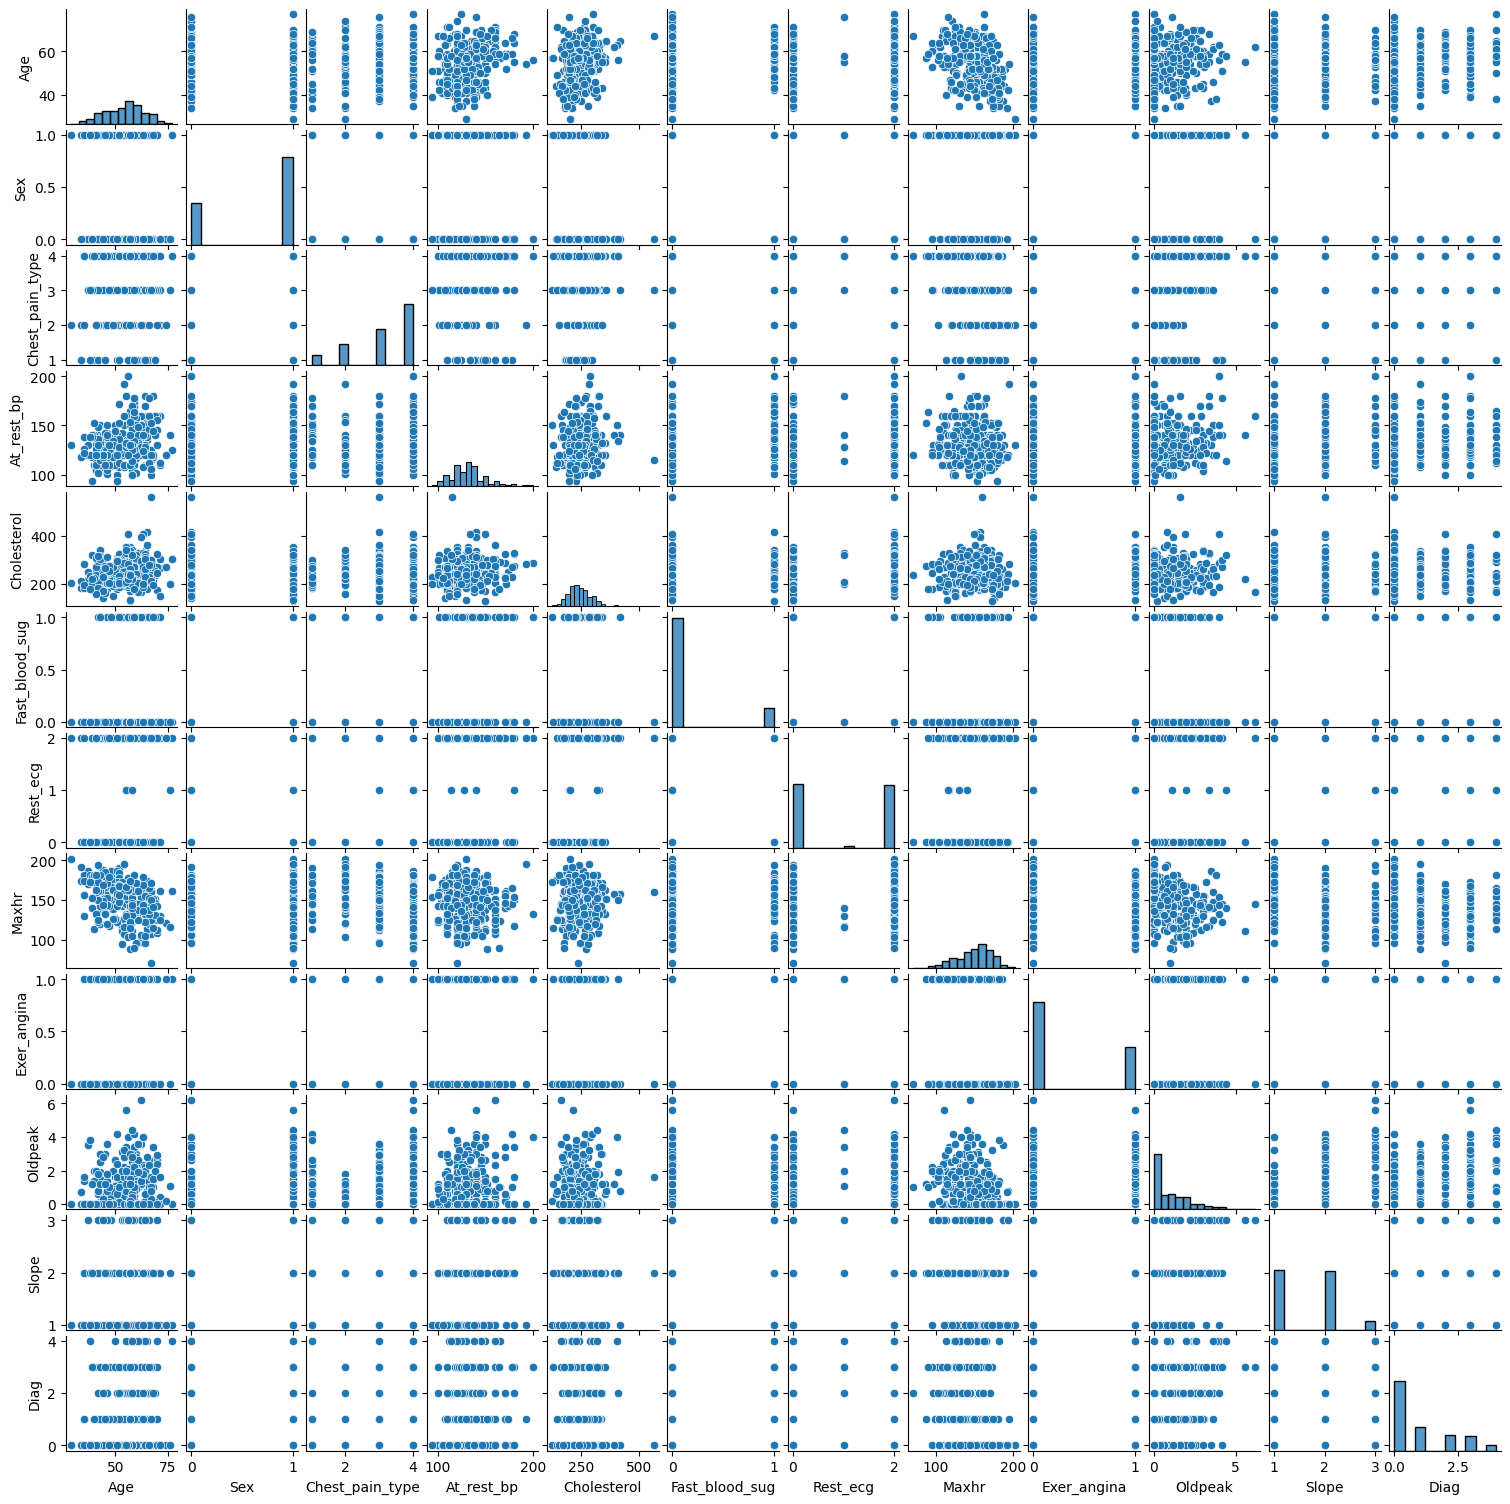

In [ ]:
# Lets look at the pairplot of our dataset.
g = sns.pairplot(data)
g.fig.set_size_inches(15,15)

##**Step 4) Split target and features** 
Next, we want to take the "Diag" column out of the features dataframe, because it is actually not a feature (in our analysis) but it is the "target", the thing we want to predict which is the label.

In [ ]:
# stablish that all the other columns are considered features except "Diag"
features = data.drop(columns='Diag')
features.head()

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
# stablish that Diag is your label
labels = np.array(data["Diag"])

#store labels as variable y
y = labels
y

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3,
       1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4,
       3, 1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1,
       0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0,
       4, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4,
       2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3,

Next, we are converting the labels (stored in variable y) to binary values so that the model is trained just to predict the presence/absence of heart disease. All the values that are 1 or higher will just be 1 from here on. The output below shows that all the other values (2,3 and 4) are now all number 1. 

In [ ]:
# storing all the values higher than 1 as just 1
y = np.where(y >= 1,1,0)
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

We can now use the np.count_nonzero() function to count how many people there are with and without heart disease in the dataset. 

In [ ]:
# Printing the amount of people with and without heart disease
print("number patients with no heart disease = " + str(np.count_nonzero(y==0)))
print("number patients with heart disease = " + str(np.count_nonzero(y==1)))


number patients with no heart disease = 164
number patients with heart disease = 139


##**Step 5) Separating train and test data**

In machine learning, it is common to split a dataset in two. A larger chunk will be the training data and a smaller chunk will be the test data. The idea is that you build a predictive model with the training data and then you use the test data to see if your model is any good. Here we will do the splitting, using a function called train_test_split from scikit-learn.

* **test_size** = 0.3. Gives the proportion of the dataset to include in the test set. 0.3 represents 30%. <br> 
* **random_state** = 2. Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order and therefore you get exactly the same results when you re-run the code and you also get the same results as someone else in the class. More details - [Random_state](https://scikit-learn.org/stable/glossary.html#term-random_state)

In [ ]:
# this splits the data into 4 different parts
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=2) # 70% training and 30% test

In [ ]:
# lets see only the features that will be used for training
X_train

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
226,47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0
109,39.0,1.0,4.0,118.0,219.0,0.0,0.0,140.0,0.0,1.2,2.0,0.0,7.0
64,54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0
14,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0
72,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0
15,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0


###**Task 2:** keeping the overview (Questions 6-7)

### **Question 6:** 

Write a list of some of the functions we have used from numpy (np), pandas (pd) and scikit-learn (sklearn) and explain the use of the functions from these packages. 




**Numpy (np) function list:**



1.   List item
2.   List item
3.   List item
4.   List item






**Pandas (pd) function list:**



1.   List item
2.   List item
3.   List item
4.   List item








**Scikit-learn (sklearn) function list:**

1.   List item
2.   List item
3.   List item
4.   List item








### **Question 7:** 

Write a list of all the steps we have taken to get the data ready for making a decision tree. 

*Hint: steps 2-5*

**Steps to get data ready list:**

1.   List item
2.   List item
3.   List item
4.   List item


## **Step 6) Making the decision tree and making predictions with it**
Here we finally make the decision tree. It is done in two steps. First we create a classifier object (no worries if this doesn't make much sense) and second we train the classifier. We use the training data set (**X_train** and **y_train**) to train the classifier / to make the decision tree. 

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

The decision tree we have created and fitted in the previous code is currently hidden, but we can visualize it, to have a better idea of the underlying decisions it's making in order to end up with the predictions it does.

In [ ]:
# Code to visualize our Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                  feature_names=features.columns,  
                                  filled=True, rounded=True,  
                                  special_characters=True,
                                  max_depth= 2)
graph = graphviz.Source(dot_data)
graph.render("Classification tree")
display(graph)

 

Each node contains 5 pieces of information: 
- **Conditional Statement**: this determines how the sample is distributed. The first node of our decision tree looks at the Thal (Thallium test). If the patient has a value less than 4.5 (that is the test value was 3, normal) then we go to the left of the tree. If the value was higher than 4.5, we go to the right of the tree.

- **Gini index value**: The impurity value calculated for each feature, and each level to decide what node we should use next. For example gini values were calculated for each of the features with a sample of 212 observations and Thal obtained the lowest gini, so it became the root. Afterwards, for each side of the split, gini values were calculated for all features again, this time with a sample of 118 (left side) and a sample of 94 (right side), and the lowest gini from both sides remain Ca and chest pain type, respectively. Gini values will continue to be calculated at each level until it reaches a 0 for a particular branch.

- **Samples**: number of observations present at this point in each particular node. The closer we get to the leaf nodes, the smaller the sample sizes.

- **values**: an array of 2 values, because we have 2 classes only,each position indicates the current class it belongs to. When the gini value reaches to 0 in a particular node, you should see that one of the values in the 2 number array reaches to 0.

 **[(0 heart vessels with 50% constriction),( > than 1 vessel with 50% constriction)]**

**NOTE**: Our tree is only displaying the top part of our tree. If you would like to see the entire tree, change "*max_deph*" argument to 9. 

Here I decided to plot the distribution of Thal values for the different Diag values. What do you notice? Do you agree with the decision tree that the Thallium test may be a good way to start triaging of patients?

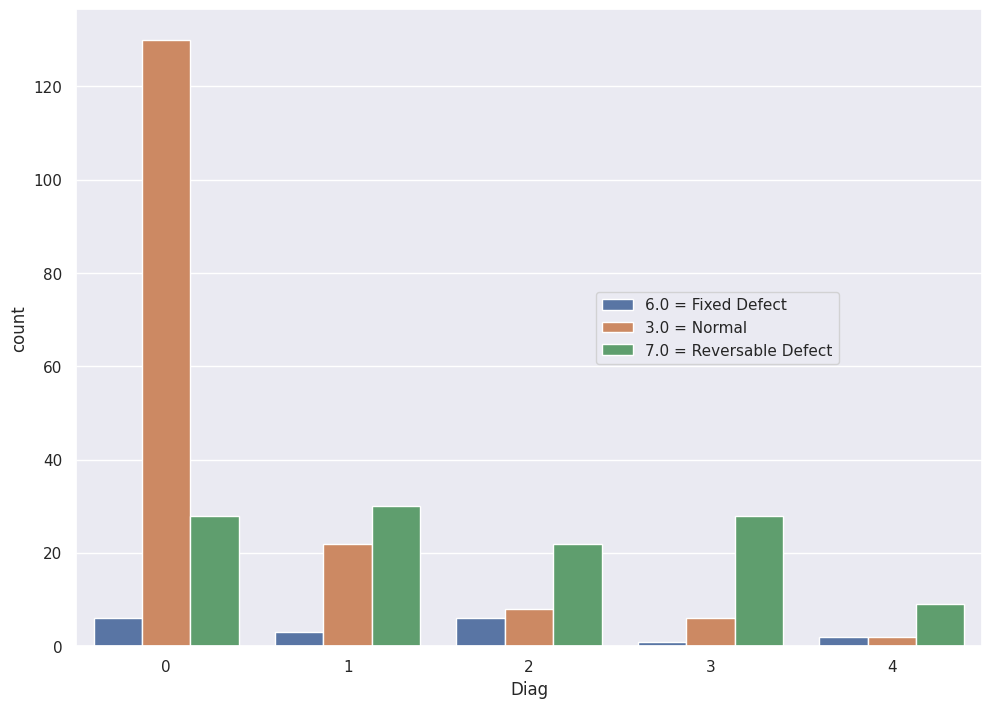

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=data, x="Diag", hue="Thal")
plt.legend(["6.0 = Fixed Defect","3.0 = Normal","7.0 = Reversable Defect"],loc="center right", bbox_to_anchor=(0.85, 0.5))

## **Step 7) Looking at the results and plotting the confusion matrix** 

First, I want to compare the **y_test** array (with the real labels for the 91 patients that are our test dataset) with **y_pred** (with the model-predicted values). 

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Look at the predicted values. Remember, 0 means no constricted vessels, 1 means at least one.  
print(y_pred)
# And the real values. 
print(y_test)

[0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1]
[0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1]


In [ ]:
# This is a simple way to look at the number of times y_test is 1 and y_pred is 1 as well (true positives)
print(np.count_nonzero(np.logical_and(y_test == 1, y_pred == 1)))

29


The confusion matrix is a nice way to look at the true and false positive and negatives. 

[[35 13]
 [14 29]]


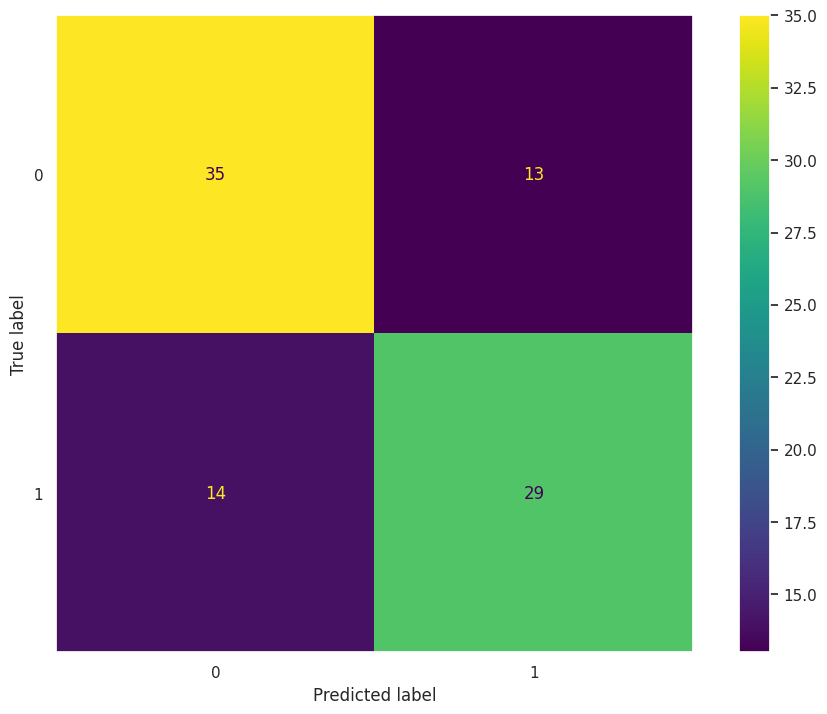

In [ ]:
# Showing the confusin matrix for our Decision tree results
print(metrics.confusion_matrix(y_test, y_pred))
plt2 = metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.grid(visible=None)

Here is a way to calculate the accuracy of the model and summarize it in one value. 

In [ ]:
acc = round(100 * metrics.accuracy_score(y_test, y_pred),2)
print("Accuracy:",acc,"%")

Accuracy: 70.33 %


###**Task 3:** false and true positives and negatives (Questions 8-11)

Have a look at this [video](https://www.youtube.com/watch?v=Ivc8c9ijWIQ).
Now look at your confusion matrix. 

###**Question 8:** 

How many true and false positives and negatives did your model generate?

**Question 8 answer:**

###**Question 9:** 

Use code with np.count_nonzero and np.logical_and to determine the number of false positives. 

In [ ]:
#Run code here:

**Question 9 answer:**

###**Question 10:** 

For what percentage of patients did you predict that they were fine, but really they did have a constricted vessel? 

Are these false positives or false negatives?

**Question 10 answer:**

###**Question 11:** 

Look at the class [Module 2 class notes](https://docs.google.com/document/d/1gguMztbc0MfowLnMl57Um0nJp3_VO6RoI6WGmYDLl78/edit#) to learn about safety and efficiency – calculate safety and efficiency for the decision tree. Include a picture of your confusion matrix (may not be the same as for others).

**Question 11 answer:**

###**Task 4** - final thoughts (Questions 12-16)

###**Question 12:** 

Look at the print of the decision tree. What is the second node on the tree on the left and on the right? 

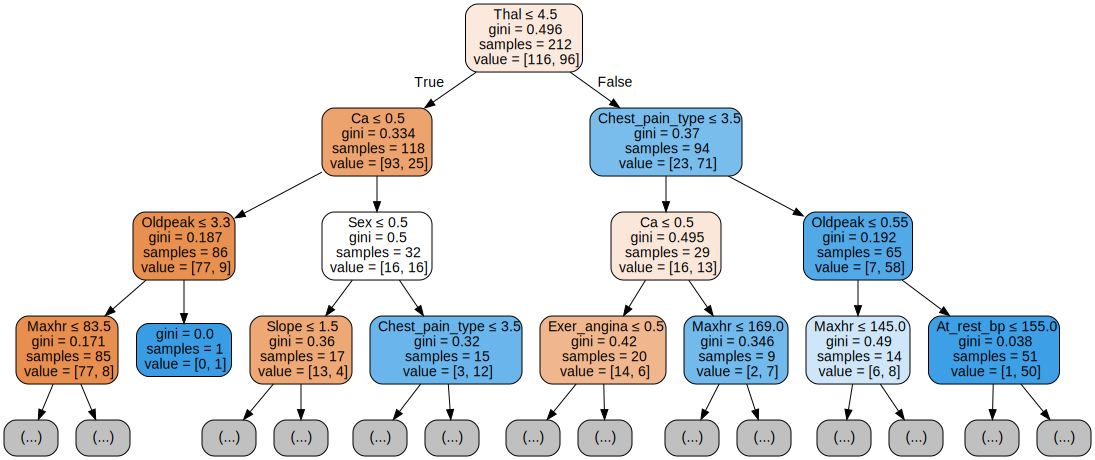

In [ ]:
# Graphing Decision Tree Classifer
dot_data2 = tree.export_graphviz(clf, out_file=None, 
                                  feature_names=features.columns,  
                                  filled=True, rounded=True,  
                                  special_characters=True,
                                  max_depth=3)
graph = graphviz.Source(dot_data2)
graph.render("Classification tree")
display(graph)

###**Question 13:** 

Why do you think the second node left and the second node on the right are not the same? 

**Question 13 answer:**

###**Question 14:** 

Look at some of the nodes that contain age as a variable. What do you notice? Did you expect to see that?

**Question 14 answer:**

###**Question 15:** 

Do you think the decision tree we created would be useful for doctors in the ER? Think of one reason why it would be and one reason why it wouldn't be useful. 

**Question 15 answer:**

###**Question 16:** 

Write down one thing you learned today and one thing that confuses you. (I know, I ask this all the time, but it is important to think about it for a few seconds!) 

**Question 16 answer:**
Learned
1.   


Confused   
2.   



# 🙂 Congratulations! You are on your way to mastering machine learning. Give yourself a pat on the back and be proud (even if you feel like some of this is still confusing!).